In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Accuracy 0.6926406926406926


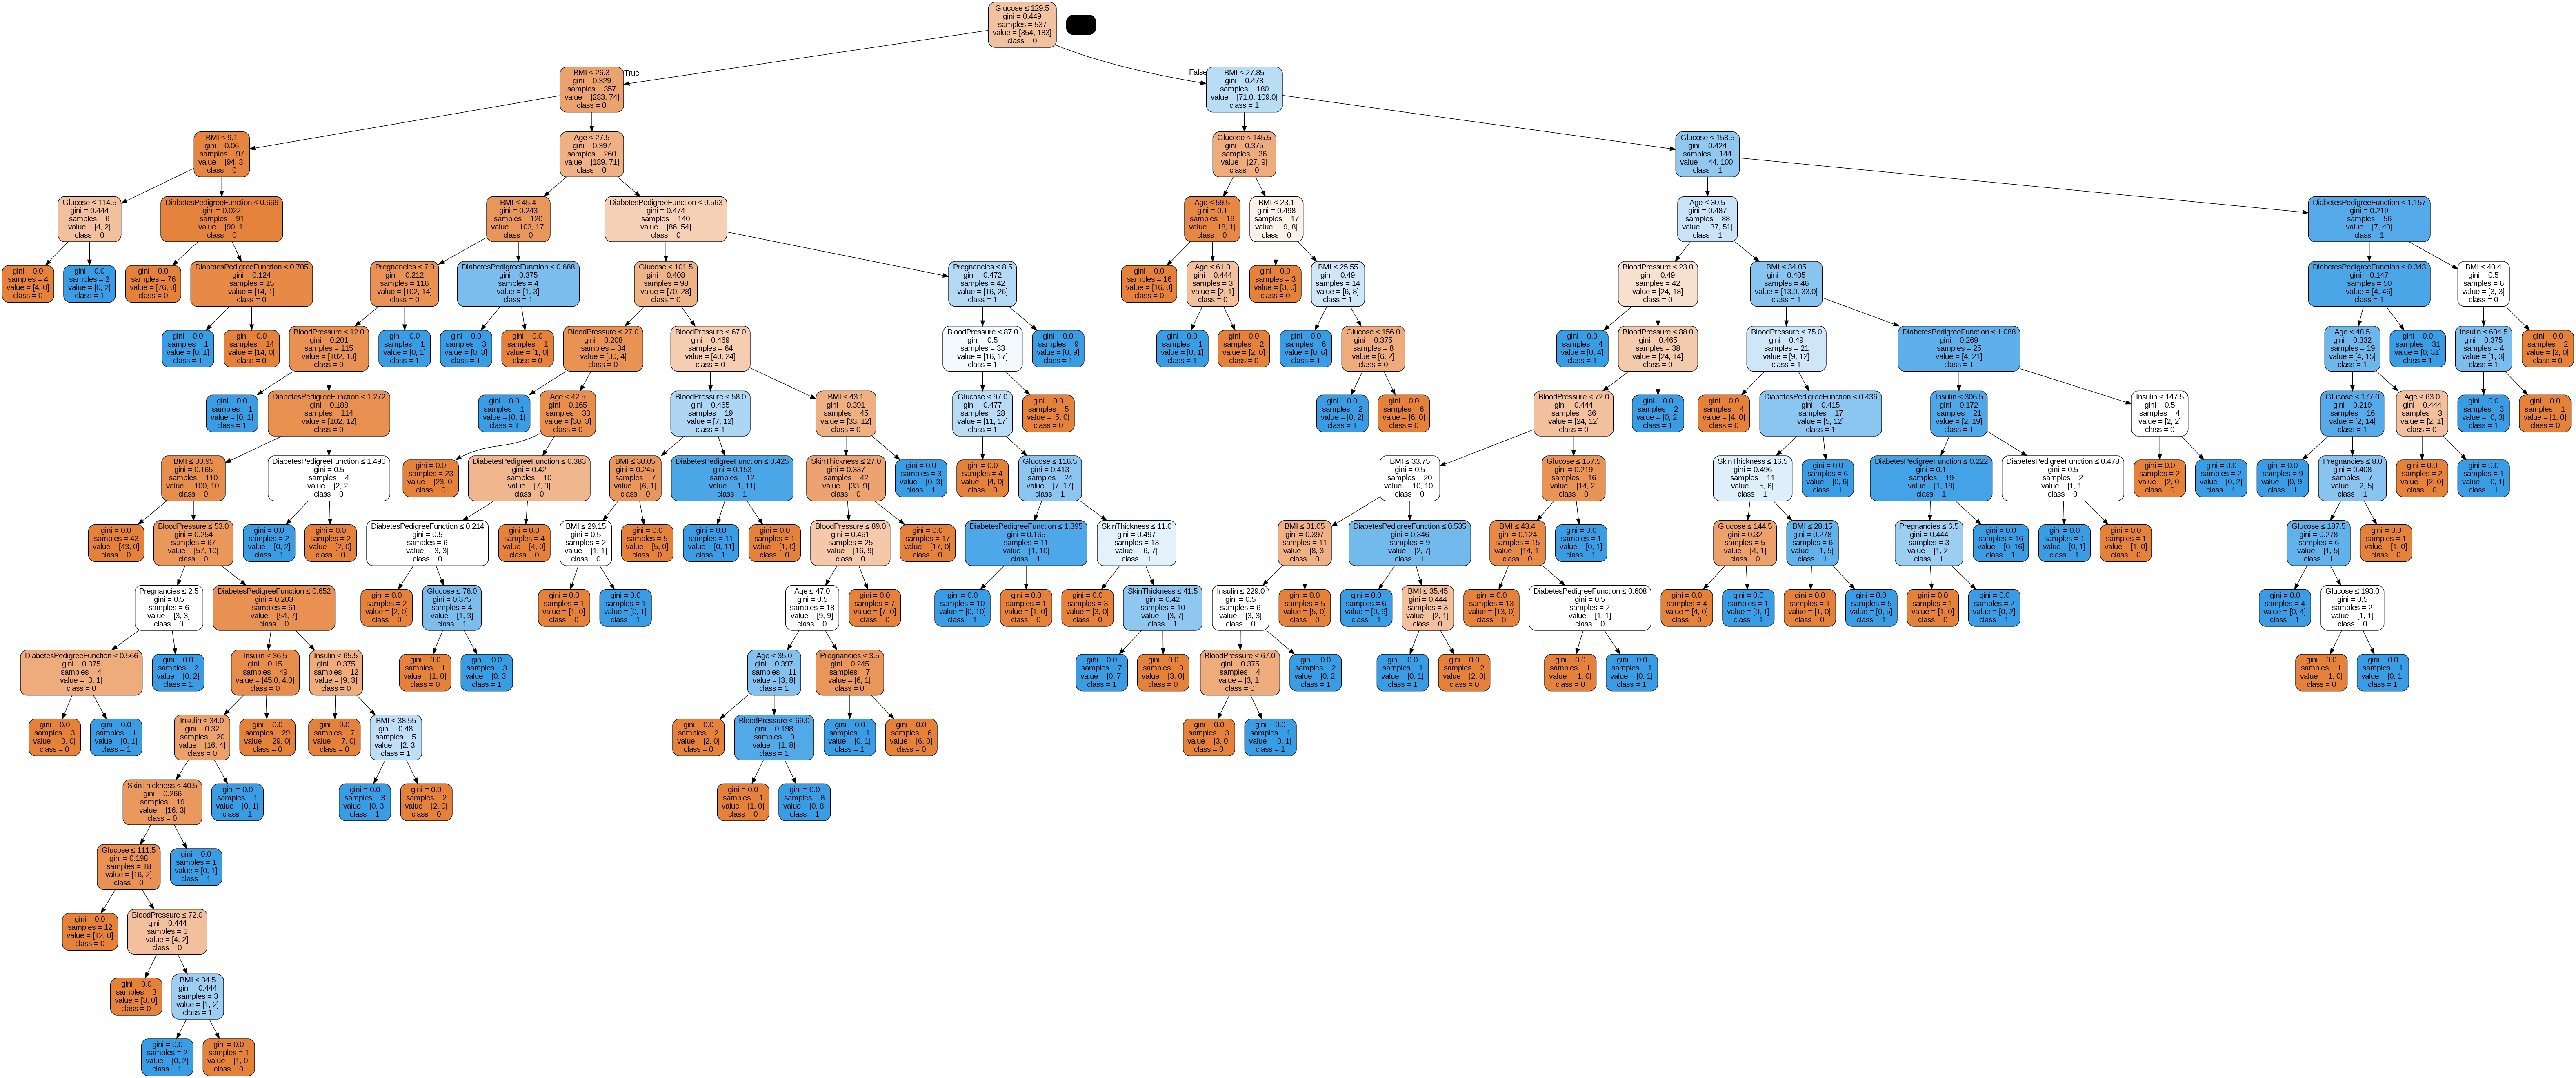

In [2]:


from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
col_names=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]
pima = pd.read_csv("/content/drive/MyDrive/computer_vision/diabetes.csv", header = 0, names =col_names)
pima.head()
feature_cols=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
X = pima[feature_cols]
y = pima.Outcome.astype("int")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
X_train = X_train.astype("float")
X_test = X_test.astype("float")
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test, y_pred))


from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled = True, rounded = True, special_characters= True, feature_names = feature_cols, class_names = ["0","1"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("diabetes.png")
Image(graph.create_png())

In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load dataset
col_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
             "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
pima = pd.read_csv("/content/drive/MyDrive/computer_vision/diabetes.csv",
                   header=0, names=col_names)

# Select two features for visualization
feature_cols = ["Glucose", "BMI"]  # Only 2 features for 2D plotting
X = pima[feature_cols]
y = pima.Outcome.astype("int")

# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Convert data types
X_train = X_train.astype("float")
X_test = X_test.astype("float")

# Train SVM model
clf = SVC(kernel='linear')  # Using a linear kernel for simplicity
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Print accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Accuracy: 0.7662337662337663


In [4]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier  # Using Random Forest
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load dataset
col_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
             "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
pima = pd.read_csv("/content/drive/MyDrive/computer_vision/diabetes.csv",
                   header=0, names=col_names)

# Define features and target variable
feature_cols = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
                "BMI", "DiabetesPedigreeFunction", "Age"]
X = pima[feature_cols]
y = pima.Outcome.astype("int")

# Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Convert data types
X_train = X_train.astype("float")
X_test = X_test.astype("float")

# Train Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Print accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Accuracy: 0.8138528138528138


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Adjusted Rand Index (ARI): 0.0997
Homogeneity Score: 0.0598


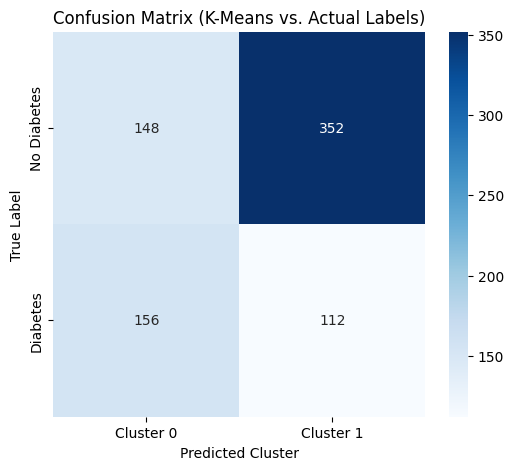

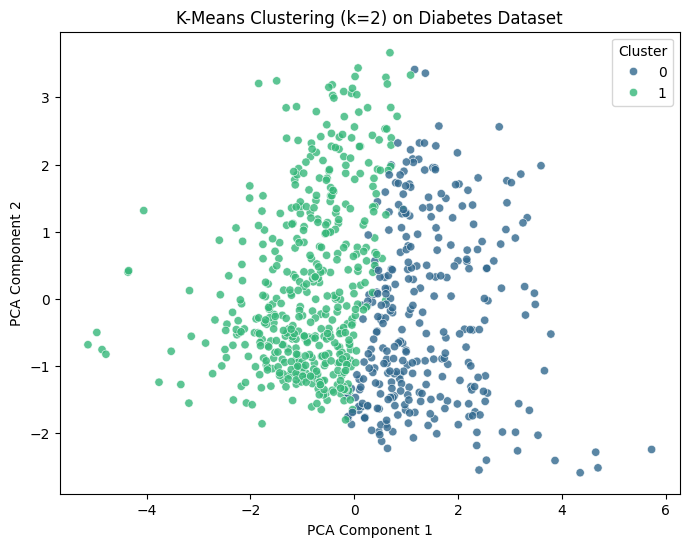

In [5]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, homogeneity_score, confusion_matrix

# Load dataset
col_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
             "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
pima = pd.read_csv("/content/drive/MyDrive/computer_vision/diabetes.csv",
                   header=0, names=col_names)

# Select features (exclude Outcome since it's unsupervised learning)
feature_cols = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
                "BMI", "DiabetesPedigreeFunction", "Age"]
X = pima[feature_cols]
y_true = pima["Outcome"]  # Actual diabetes labels

# Standardize features (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means Clustering
k = 2  # We expect two groups: diabetic & non-diabetic
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataset
pima["Cluster"] = clusters

# 📊 Accuracy Metrics (How well does clustering match actual labels?)
ari_score = adjusted_rand_score(y_true, clusters)
homogeneity = homogeneity_score(y_true, clusters)

print(f"Adjusted Rand Index (ARI): {ari_score:.4f}")  # Closer to 1 is better
print(f"Homogeneity Score: {homogeneity:.4f}")  # Closer to 1 is better

# 📊 Confusion Matrix
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_true, clusters)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Cluster 0", "Cluster 1"],
            yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted Cluster")
plt.ylabel("True Label")
plt.title("Confusion Matrix (K-Means vs. Actual Labels)")
plt.show()

# 📊 Visualize Clusters using PCA (2D plot)
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=pima["Cluster"], palette="viridis", alpha=0.8)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering (k=2) on Diabetes Dataset")
plt.legend(title="Cluster")
plt.show()


In [6]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive
from google.colab import drive
drive.mount("/content/drive")

# Create Spark session
spark = SparkSession.builder.appName("DiabetesPrediction").getOrCreate()

# Load dataset
data = spark.read.csv("/content/drive/MyDrive/computer_vision/diabetes.csv", header=True, inferSchema=True)

# Define feature columns (Fixed Column Name Issue)
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                'BMI', 'DiabetesPedigreeFunction', 'Age']

# Convert features into a single vector
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
data = assembler.transform(data)

# Select relevant columns
data = data.select("features", "Outcome")

# Split data into training (80%) and testing (20%) sets
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

# Train Decision Tree model
dt = DecisionTreeClassifier(labelCol="Outcome", featuresCol="features")
model = dt.fit(train_data)

# Make predictions on test data
predictions = model.transform(test_data)

# Evaluate accuracy
evaluator = MulticlassClassificationEvaluator(labelCol="Outcome", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Test Accuracy: {accuracy:.4f}")

# Show some predictions
predictions.select("features", "Outcome", "prediction").show(10)




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Test Accuracy: 0.7967
+--------------------+-------+----------+
|            features|Outcome|prediction|
+--------------------+-------+----------+
|(8,[0,1,6,7],[3.0...|      0|       0.0|
|(8,[1,5,6,7],[73....|      0|       0.0|
|(8,[1,5,6,7],[117...|      0|       1.0|
|(8,[1,5,6,7],[145...|      1|       1.0|
|[0.0,78.0,88.0,29...|      0|       0.0|
|[0.0,91.0,68.0,32...|      0|       0.0|
|[0.0,95.0,64.0,39...|      0|       0.0|
|[0.0,100.0,88.0,6...|      0|       1.0|
|[0.0,104.0,64.0,2...|      0|       0.0|
|[0.0,104.0,64.0,3...|      1|       0.0|
+--------------------+-------+----------+
only showing top 10 rows



In [7]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LinearSVC
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive
from google.colab import drive
drive.mount("/content/drive")

# Create Spark session
spark = SparkSession.builder.appName("DiabetesPrediction_SVM").getOrCreate()

# Load dataset
data = spark.read.csv("/content/drive/MyDrive/computer_vision/diabetes.csv", header=True, inferSchema=True)

# Define feature columns
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                'BMI', 'DiabetesPedigreeFunction', 'Age']

# Convert features into a single vector
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
data = assembler.transform(data)

# Select relevant columns
data = data.select("features", "Outcome")

# Split data into training (80%) and testing (20%) sets
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

# Train SVM model
svm = LinearSVC(labelCol="Outcome", featuresCol="features", maxIter=100, regParam=0.01)
model = svm.fit(train_data)

# Make predictions on test data
predictions = model.transform(test_data)

# Evaluate accuracy
evaluator = MulticlassClassificationEvaluator(labelCol="Outcome", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Test Accuracy: {accuracy:.4f}")

# Show some predictions
predictions.select("features", "Outcome", "prediction").show(10)




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Test Accuracy: 0.8130
+--------------------+-------+----------+
|            features|Outcome|prediction|
+--------------------+-------+----------+
|(8,[0,1,6,7],[3.0...|      0|       0.0|
|(8,[1,5,6,7],[73....|      0|       0.0|
|(8,[1,5,6,7],[117...|      0|       1.0|
|(8,[1,5,6,7],[145...|      1|       1.0|
|[0.0,78.0,88.0,29...|      0|       0.0|
|[0.0,91.0,68.0,32...|      0|       0.0|
|[0.0,95.0,64.0,39...|      0|       0.0|
|[0.0,100.0,88.0,6...|      0|       0.0|
|[0.0,104.0,64.0,2...|      0|       0.0|
|[0.0,104.0,64.0,3...|      1|       0.0|
+--------------------+-------+----------+
only showing top 10 rows



In [8]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive
from google.colab import drive
drive.mount("/content/drive")

# Create Spark session
spark = SparkSession.builder.appName("DiabetesPrediction_RF").getOrCreate()

# Load dataset
data = spark.read.csv("/content/drive/MyDrive/computer_vision/diabetes.csv", header=True, inferSchema=True)

# Define feature columns
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                'BMI', 'DiabetesPedigreeFunction', 'Age']

# Convert features into a single vector
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
data = assembler.transform(data)

# Select relevant columns
data = data.select("features", "Outcome")

# Split data into training (80%) and testing (20%) sets
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

# Train Random Forest model
rf = RandomForestClassifier(labelCol="Outcome", featuresCol="features", numTrees=100)
model = rf.fit(train_data)

# Make predictions on test data
predictions = model.transform(test_data)

# Evaluate accuracy
evaluator = MulticlassClassificationEvaluator(labelCol="Outcome", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Test Accuracy: {accuracy:.4f}")

# Show some predictions
predictions.select("features", "Outcome", "prediction").show(10)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Test Accuracy: 0.8211
+--------------------+-------+----------+
|            features|Outcome|prediction|
+--------------------+-------+----------+
|(8,[0,1,6,7],[3.0...|      0|       0.0|
|(8,[1,5,6,7],[73....|      0|       0.0|
|(8,[1,5,6,7],[117...|      0|       1.0|
|(8,[1,5,6,7],[145...|      1|       1.0|
|[0.0,78.0,88.0,29...|      0|       0.0|
|[0.0,91.0,68.0,32...|      0|       0.0|
|[0.0,95.0,64.0,39...|      0|       0.0|
|[0.0,100.0,88.0,6...|      0|       1.0|
|[0.0,104.0,64.0,2...|      0|       0.0|
|[0.0,104.0,64.0,3...|      1|       0.0|
+--------------------+-------+----------+
only showing top 10 rows



In [9]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive
from google.colab import drive
drive.mount("/content/drive")

# Create Spark session
spark = SparkSession.builder.appName("Diabetes_KMeans").getOrCreate()

# Load dataset
data = spark.read.csv("/content/drive/MyDrive/computer_vision/diabetes.csv", header=True, inferSchema=True)

# Define feature columns
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                'BMI', 'DiabetesPedigreeFunction', 'Age']

# Convert features into a single vector
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
data = assembler.transform(data)

# Select only feature vector (KMeans does not use labels)
data = data.select("features")

# Train K-Means model (Choosing 2 clusters since we have binary classification data)
kmeans = KMeans(k=2, seed=42, featuresCol="features", predictionCol="cluster")
model = kmeans.fit(data)

# Make predictions
predictions = model.transform(data)

# Evaluate clustering using Silhouette Score
evaluator = ClusteringEvaluator(featuresCol="features", predictionCol="cluster", metricName="silhouette")
silhouette_score = evaluator.evaluate(predictions)
print(f"Silhouette Score: {silhouette_score:.4f}")

# Show some clustered data
predictions.select("features", "cluster").show(10)




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Silhouette Score: 0.7488
+--------------------+-------+
|            features|cluster|
+--------------------+-------+
|[6.0,148.0,72.0,3...|      0|
|[1.0,85.0,66.0,29...|      0|
|[8.0,183.0,64.0,0...|      0|
|[1.0,89.0,66.0,23...|      0|
|[0.0,137.0,40.0,3...|      1|
|[5.0,116.0,74.0,0...|      0|
|[3.0,78.0,50.0,32...|      0|
|[10.0,115.0,0.0,0...|      0|
|[2.0,197.0,70.0,4...|      1|
|[8.0,125.0,96.0,0...|      0|
+--------------------+-------+
only showing top 10 rows



In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_openml

# Load dataset
boston = fetch_openml(name='boston', version=1, as_frame=True)
df = boston.frame

# Select features and target variable
X = df[['RM']]  # Number of rooms as a feature
y = df['MEDV']  # Median house price

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# 📊 Plot Regression Line
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Number of Rooms (RM)")
plt.ylabel("House Price (MEDV)")
plt.title("Linear Regression: House Prices vs. Rooms")
plt.legend()
plt.show()

# Print Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
from sklearn.metrics import accuracy_score




In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load dataset
df = sns.load_dataset('titanic').dropna()

# Select features and target variable
X = df[['pclass', 'age', 'fare', 'sibsp', 'parch']]
y = df['survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# 📊 Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d", xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Titanic Survival")
plt.show()

# Print Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


In [ ]:
# ✅ Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_percentage_error

#  Load California Housing dataset (built-in)
data = fetch_california_housing(as_frame=True)
df = data.frame  # Convert to Pandas DataFrame

#  Select features and target variable
X = df.drop(columns=["MedHouseVal"])  # Features
y = df["MedHouseVal"]  # Target (Median House Value)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

#  Make predictions
y_pred = model.predict(X_test)

#  Evaluate performance
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # Convert to %

print(f"R² Score: {r2:.4f}")  # How well the model explains variance
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")  # Lower is better

#  Feature Importance Visualization (Based on Coefficients)
feature_importance = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
feature_importance = feature_importance.sort_values(by="Coefficient", ascending=False)

#  Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x="Coefficient", y="Feature", hue="Feature", data=feature_importance,
            palette="coolwarm", legend=False)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance in Multiple Linear Regression")
plt.show()


In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Initialize Spark Session
spark = SparkSession.builder.appName("LinearRegression").getOrCreate()

# Load California Housing Dataset
california = fetch_california_housing(as_frame=True)
df = pd.DataFrame(california.data, columns=california.feature_names)
df["MedHouseVal"] = california.target  # Target variable

# Convert to PySpark DataFrame
spark_df = spark.createDataFrame(df)

# Assemble features into a single column
feature_cols = california.feature_names
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
data = assembler.transform(spark_df).select("features", "MedHouseVal")

# Train-Test Split
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

# Train Linear Regression Model
lr = LinearRegression(featuresCol="features", labelCol="MedHouseVal")
model = lr.fit(train_data)

# Model Evaluation
predictions = model.transform(test_data)
print(f"RMSE: {model.summary.rootMeanSquaredError:.4f}")
print(f"R² Score: {model.summary.r2:.4f}")

# Show some predictions
predictions.select("features", "MedHouseVal", "prediction").show(10)


In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Initialize Spark Session
spark = SparkSession.builder.appName("LogisticRegression").getOrCreate()

# Load Breast Cancer Dataset
cancer = load_breast_cancer(as_frame=True)
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df["target"] = cancer.target  # Target variable (0 or 1)

# Convert to PySpark DataFrame
spark_df = spark.createDataFrame(df)

# Assemble features into a single column
feature_cols = cancer.feature_names
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
data = assembler.transform(spark_df).select("features", "target")

# Train-Test Split
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

# Train Logistic Regression Model
lr = LogisticRegression(featuresCol="features", labelCol="target")
model = lr.fit(train_data)

# Model Evaluation
predictions = model.transform(test_data)
accuracy = predictions.filter(predictions.prediction == predictions.target).count() / test_data.count()
print(f"Test Accuracy: {accuracy:.4f}")

# Show some predictions
predictions.select("features", "target", "prediction").show(10)


In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from sklearn.datasets import load_diabetes
import pandas as pd

# Initialize Spark Session
spark = SparkSession.builder.appName("MultipleLinearRegression").getOrCreate()

# Load Diabetes Dataset
diabetes = load_diabetes(as_frame=True)
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["target"] = diabetes.target  # Target variable

# Convert to PySpark DataFrame
spark_df = spark.createDataFrame(df)

# Assemble features into a single column
feature_cols = diabetes.feature_names
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
data = assembler.transform(spark_df).select("features", "target")

# Train-Test Split
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

# Train Multiple Linear Regression Model
mlr = LinearRegression(featuresCol="features", labelCol="target")
model = mlr.fit(train_data)

# Model Evaluation
predictions = model.transform(test_data)
print(f"RMSE: {model.summary.rootMeanSquaredError:.4f}")
print(f"R² Score: {model.summary.r2:.4f}")

# Show some predictions
predictions.select("features", "target", "prediction").show(10)
